In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from tensorflow.keras.models import Sequential      #This allows appending layers to existing models
from tensorflow.keras.layers import Dense           #This allows defining the characteristics of a particular layer
from tensorflow.keras import optimizers             #This allows using whichever optimiser we want (sgd,adam,RMSprop)
from tensorflow.keras.regularizers import l2
tf.keras.backend.set_floatx('float64')

In [2]:
def loss(model, x0, t):
    with tf.GradientTape() as tape_t:
        tape_t.watch([t])
        x_net = tf.exp(-t) @ x0 + model(t) * (1-tf.exp(-t))
    dx_dt = tape_t.batch_jacobian(x_net, t)[:, :, 0] # This takes the gradient of each element of x for each time step
    
    dx_dt = tf.transpose(dx_dt) # We need to transpose, as x_net is a collection of row vectors,
    x_net = tf.transpose(x_net) # but we need a collection of column vectors for the matrix multiplications
    
    Ax = A @ x_net
    xTx = tf.einsum("ij,ji->i", tf.transpose(x_net), x_net)
    xTAx = tf.einsum("ij,ji->i", tf.transpose(x_net), Ax)
    fx = xTx * Ax + (1 - xTAx) * x_net
    
    return tf.losses.mean_squared_error(zeros, dx_dt - fx + x_net)

def train(model, optimizer, x0, t):
    with tf.GradientTape() as tape:
        current_loss = loss(model, x0, t)

    grads = tape.gradient(current_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

N = 6
x0 = np.random.rand(N, 1)
x0 /= np.linalg.norm(x0) # normalize
x0 = tf.reshape(tf.convert_to_tensor(x0, dtype=tf.dtypes.float64), shape=(1, -1)) # row vector, since the NN outputs row vectors

Nt = 5
T_n = 10
t = np.linspace(0, T_n, Nt)
t = tf.reshape(tf.convert_to_tensor(t, dtype=tf.dtypes.float64), shape=(-1, 1)) # column vector

zeros = tf.convert_to_tensor(np.zeros((N, Nt)))

# Setting up model
model = Sequential()
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(25, activation='sigmoid'))
model.add(Dense(N, activation="linear"))
model.build(t.shape)

eta = 0.01
sgd = optimizers.Adam(eta)
#train(model, sgd, x0, t)
g_dnn = tf.transpose(tf.exp(-t) @ x0 + model(t) * (1-tf.exp(-t)))

In [12]:
# Setting up data
N = 6
Q = np.random.rand(N, N)
A = (Q.T + Q)/2# Setting up data
N = 6
Q = np.random.rand(N, N)
A = (Q.T + Q)/2

In [14]:
print(A.shape[0])

6


In [5]:
iters = 2000
for i in range(iters):
    train(model, sgd, x0, t)
    
# Output of model
g_dnn = tf.transpose(tf.exp(-t) @ x0 + model(t) * (1-tf.exp(-t)))

[0.43456945 0.36111801 0.43200626 0.45934883 0.33124374 0.41640124]
2.874 +- 0.0013


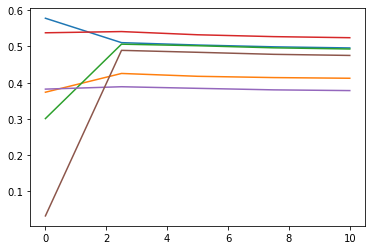

In [8]:
eig_vec = np.array(g_dnn[:, -1])
eig_vec /= np.linalg.norm(eig_vec)
print(eig_vec)
print(f"{np.mean(A @ eig_vec / eig_vec):.3f} +- {np.std(A @ eig_vec / eig_vec):.4f}")

for i in range(N):
    plt.plot(np.linspace(0, T_n, Nt), g_dnn[i, :])

In [11]:
np.mean(A @ eig_vec / eig_vec) - eig_val_anal

-0.00015083214273348133

In [10]:
# eigenvalues from max to min
eigenvalues, v = np.linalg.eig(A)
eig_vec_anal = v[:,0]
eig_val_anal = eigenvalues[0]
print(eig_vec_anal)
print(eig_val_anal)

print(eigenvalues)
print(v)

[-0.43458998 -0.36072276 -0.43219335 -0.45928745 -0.33118098 -0.41664583]
2.8745930693848774
[ 2.87459307 -0.41194608  0.70563454  0.0708924   0.4060583   0.26913589]
[[-0.43458998 -0.61633671 -0.16254948  0.4097195  -0.41701094  0.25113756]
 [-0.36072276 -0.06223108  0.19778939 -0.70007004 -0.48705208 -0.31554391]
 [-0.43219335  0.50941512 -0.68967269 -0.12538253 -0.00654584  0.24958585]
 [-0.45928745  0.35750758  0.67576233  0.14809301  0.08463776  0.41891949]
 [-0.33118098  0.23810593  0.01568939  0.49347616  0.00946293 -0.76796504]
 [-0.41664583 -0.41502588 -0.04367737 -0.24669989  0.762618   -0.0990203 ]]


In [ ]:
def loss(model, x0, t):
    with tf.GradientTape() as tape_t:
        tape_t.watch([t])
        x_net = tf.exp(-t) @ x0 + model(t) * (1-tf.exp(-t))
    dx_dt = tape_t.batch_jacobian(x_net, t)[:, :, 0] # This takes the gradient of each element of x for each time step
    
    dx_dt = tf.transpose(dx_dt) # We need to transpose, as x_net is a collection of row vectors,
    x_net = tf.transpose(x_net) # but we need a collection of column vectors for the matrix multiplications
    
    Ax = A @ x_net
    xTx = tf.einsum("ij,ji->i", tf.transpose(x_net), x_net)
    xTAx = tf.einsum("ij,ji->i", tf.transpose(x_net), Ax)
    fx = xTx * Ax + (1 - xTAx) * x_net
    
    return tf.losses.mean_squared_error(model.zeros, dx_dt - fx + x_net)

def train(model, optimizer, x0, t):
    with tf.GradientTape() as tape:
        current_loss = loss(model, x0, t)

    grads = tape.gradient(current_loss, model.trainable_variables)
    model.optimizer.apply_gradients(zip(grads, model.trainable_variables))

def eigenMdl(x0, t, A):
    x0 /= np.linalg.norm(x0) # normalize
    x0 = tf.reshape(tf.convert_to_tensor(x0, dtype=tf.dtypes.float64), shape=(1, -1)) # row vector, since the NN outputs row vectors
    
    t = tf.reshape(tf.convert_to_tensor(t, dtype=tf.dtypes.float64), shape=(-1, 1)) # column vector
    
    N = len(x0)

    # Setting up model
    model = Sequential()
    model.add(Dense(100, activation='sigmoid'))
    model.add(Dense(50, activation='sigmoid'))
    model.add(Dense(25, activation='sigmoid'))
    model.add(Dense(N, activation="linear"))
    model.build(t.shape)

    eta = 0.01
    model.optimizer = optimizers.Adam(eta)
    model.zeros = tf.convert_to_tensor(np.zeros((N, len(t))))
    
    return x0, t, model
    
def trainMdl(model, x0, t, optimizer, iters):
    for i in range(iters):
        train(model, optimizer, x0, t)
    g_dnn = tf.transpose(tf.exp(-t) @ x0 + model(t) * (1-tf.exp(-t)))
    return g_dnn

In [ ]:
x0 = np.random.rand(N, 1) * 2 - 1

Nt = 50
T_n = 10
t = np.linspace(0, T_n, Nt)

x0, t, model = eigenMdl(x0, t, A)

In [ ]:
iters = 100
g_dnn = trainMdl(model, x0, t, optimizer, iters)